In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing Dataset

In [4]:
dataset =pd.read_csv('kidney_disease.csv')

In [5]:
# Data Visualization

C:\Users\Deepak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Deepak\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


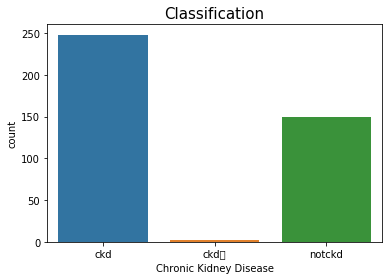

In [6]:
sns.countplot(dataset.classification)
plt.xlabel('Chronic Kidney Disease')
plt.title("Classification",fontsize=15)
plt.show()

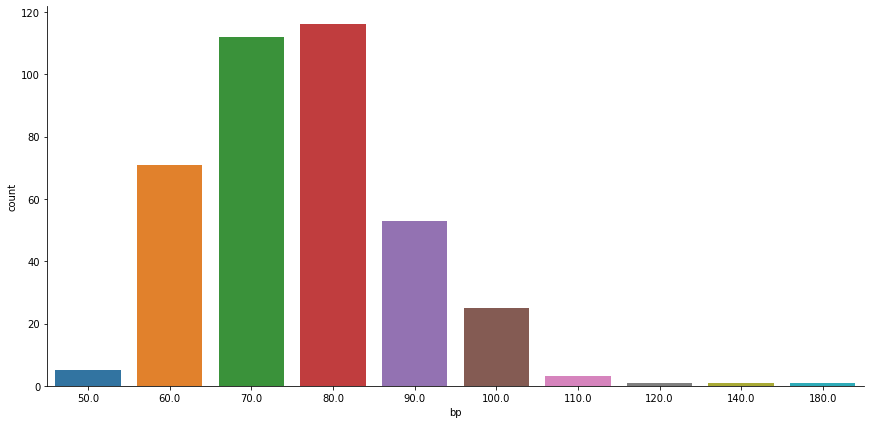

In [7]:
sns.catplot(data=dataset, x='bp', kind= 'count',height=6,aspect=2)

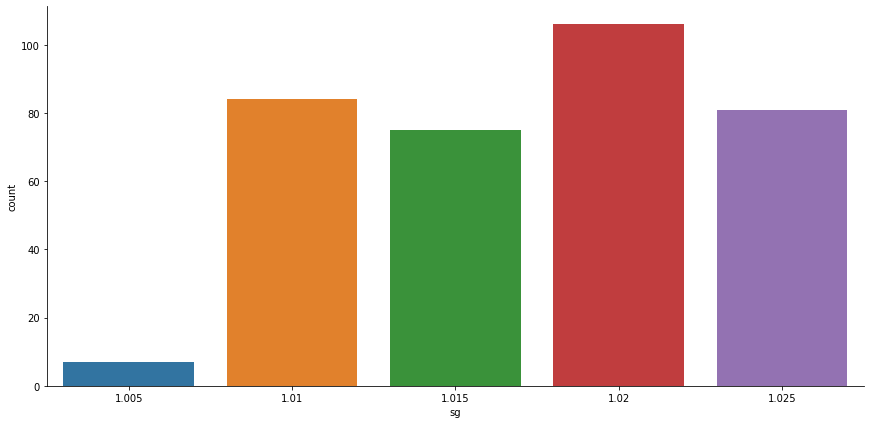

In [8]:
sns.catplot(data=dataset, x='sg', kind= 'count',height=6,aspect=2)

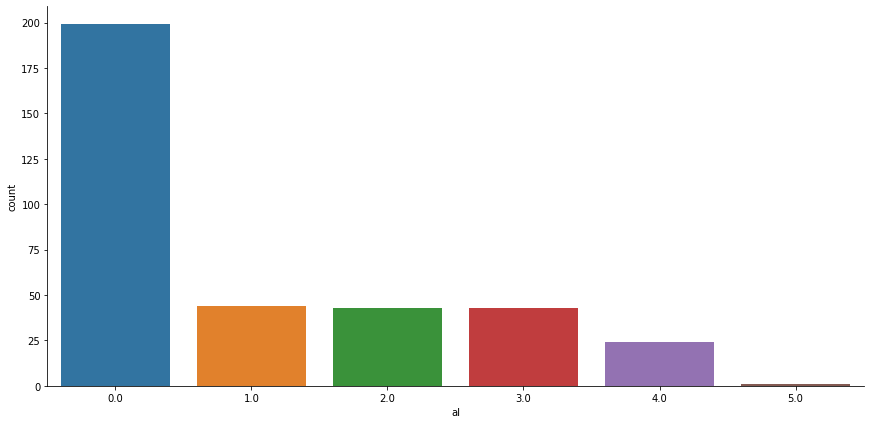

In [9]:
sns.catplot(data=dataset, x='al', kind= 'count',height=6,aspect=2)

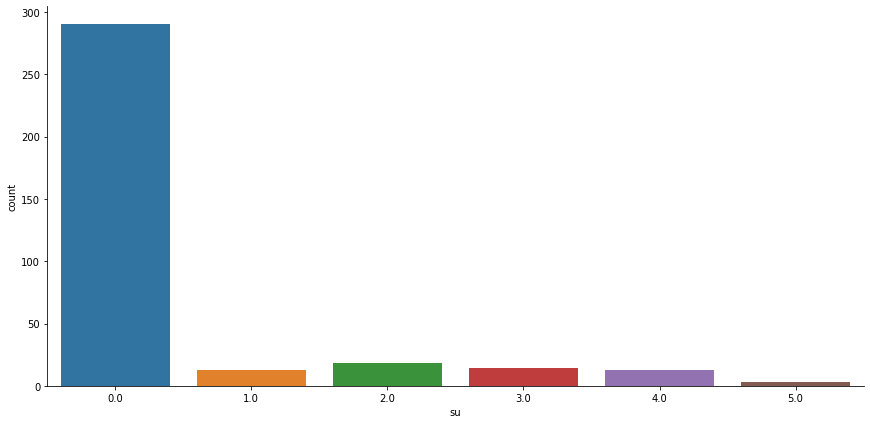

In [10]:
sns.catplot(data=dataset, x='su', kind= 'count',height=6,aspect=2)

In [11]:
# Taking Care Of Missing Data

In [12]:
dataset=dataset.iloc[:,1:]

In [13]:
dataset.drop('age',axis=1,inplace=True)
dataset.drop('wc',axis=1,inplace=True)
dataset.drop('pcv',axis=1,inplace=True)
dataset.drop('rc',axis=1,inplace=True)
dataset.drop('su',axis=1,inplace=True)
dataset.drop('rbc',axis=1,inplace=True)
dataset.drop('pc',axis=1,inplace=True)
dataset.drop('sc',axis=1,inplace=True)
dataset.drop('pot',axis=1,inplace=True)
dataset.drop('dm',axis=1,inplace=True)
dataset.drop('cad',axis=1,inplace=True)
dataset.drop('pe',axis=1,inplace=True)

In [14]:
dataset

,bp,sg,al,pcc,ba,bgr,bu,sod,hemo,htn,appet,ane,classification
0,80.0,1.020,1.0,notpresent,notpresent,121.0,36.0,NaN,15.4,yes,good,no,ckd
1,50.0,1.020,4.0,notpresent,notpresent,NaN,18.0,NaN,11.3,no,good,no,ckd
2,80.0,1.010,2.0,notpresent,notpresent,423.0,53.0,NaN,9.6,no,poor,yes,ckd
3,70.0,1.005,4.0,present,notpresent,117.0,56.0,111.0,11.2,yes,poor,yes,ckd
4,80.0,1.010,2.0,notpresent,notpresent,106.0,26.0,NaN,11.6,no,good,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,notpresent,notpresent,140.0,49.0,150.0,15.7,no,good,no,notckd
396,70.0,1.025,0.0,notpresent,notpresent,75.0,31.0,141.0,16.5,no,good,no,notckd
397,80.0,1.020,0.0,notpresent,notpresent,100.0,26.0,137.0,15.8,no,good,no,notckd
398,60.0,1.025,0.0,notpresent,notpresent,114.0,50.0,135.0,14.2,no,good,no,notckd


In [15]:
dataset.isnull().any()

bp                 True
sg                 True
al                 True
pcc                True
ba                 True
bgr                True
bu                 True
sod                True
hemo               True
htn                True
appet              True
ane                True
classification    False
dtype: bool

In [16]:
dataset[['classification']] = dataset[['classification']].replace('ckd\t','ckd')

In [17]:
dataset['bp'].fillna((dataset['bp'].mean()),inplace=True)
dataset['sg'].fillna((dataset['sg'].mean()),inplace=True)
dataset['al'].fillna((dataset['al'].mean()),inplace=True)
dataset['bgr'].fillna((dataset['bgr'].mean()),inplace=True)
dataset['bu'].fillna((dataset['bu'].mean()),inplace=True)
dataset['sod'].fillna((dataset['sod'].mean()),inplace=True)
dataset['hemo'].fillna((dataset['hemo'].mean()),inplace=True)

In [18]:
dataset['htn']=dataset['htn'].fillna(value=dataset['htn'].mode().iloc[0])
dataset['ba']=dataset['ba'].fillna(value=dataset['ba'].mode().iloc[0])
dataset['pcc']=dataset['pcc'].fillna(value=dataset['pcc'].mode().iloc[0])
dataset['appet']=dataset['appet'].fillna(value=dataset['appet'].mode().iloc[0])
dataset['ane']=dataset['ane'].fillna(value=dataset['ane'].mode().iloc[0])

In [19]:
dataset.isnull().any()

bp                False
sg                False
al                False
pcc               False
ba                False
bgr               False
bu                False
sod               False
hemo              False
htn               False
appet             False
ane               False
classification    False
dtype: bool

In [20]:
# Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [22]:
dataset['pcc']=lb.fit_transform(dataset['pcc'])
dataset['ba']=lb.fit_transform(dataset['ba'])
dataset['htn']=lb.fit_transform(dataset['htn'])
dataset['appet']=lb.fit_transform(dataset['appet'])
dataset['ane']=lb.fit_transform(dataset['ane'])
dataset['classification']=lb.fit_transform(dataset['classification'])

In [23]:
dataset

,bp,sg,al,pcc,ba,bgr,bu,sod,hemo,htn,appet,ane,classification
0,80.0,1.020,1.0,0,0,121.000000,36.0,137.528754,15.4,1,0,0,0
1,50.0,1.020,4.0,0,0,148.036517,18.0,137.528754,11.3,0,0,0,0
2,80.0,1.010,2.0,0,0,423.000000,53.0,137.528754,9.6,0,1,1,0
3,70.0,1.005,4.0,1,0,117.000000,56.0,111.000000,11.2,1,1,1,0
4,80.0,1.010,2.0,0,0,106.000000,26.0,137.528754,11.6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0,0,140.000000,49.0,150.000000,15.7,0,0,0,1
396,70.0,1.025,0.0,0,0,75.000000,31.0,141.000000,16.5,0,0,0,1
397,80.0,1.020,0.0,0,0,100.000000,26.0,137.000000,15.8,0,0,0,1
398,60.0,1.025,0.0,0,0,114.000000,50.0,135.000000,14.2,0,0,0,1


In [24]:
# Dependent and Independent Variables

In [25]:
x=dataset.iloc[:,0:12].values
y=dataset.iloc[:,12:].values
x

array([[80.   ,  1.02 ,  1.   , ...,  1.   ,  0.   ,  0.   ],
       [50.   ,  1.02 ,  4.   , ...,  0.   ,  0.   ,  0.   ],
       [80.   ,  1.01 ,  2.   , ...,  0.   ,  1.   ,  1.   ],
       ...,
       [80.   ,  1.02 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [60.   ,  1.025,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [80.   ,  1.025,  0.   , ...,  0.   ,  0.   ,  0.   ]])

In [26]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.26233836,  0.48335471, -0.01333816, ...,  1.3119026 ,
        -0.50780078, -0.42008403],
       [-1.96658024,  0.48335471,  2.3475161 , ..., -0.76225171,
        -0.50780078, -0.42008403],
       [ 0.26233836, -1.38139079,  0.77361326, ..., -0.76225171,
         1.96927621,  2.38047614],
       ...,
       [ 0.26233836,  0.48335471, -0.80028958, ..., -0.76225171,
        -0.50780078, -0.42008403],
       [-1.22360737,  1.41572747, -0.80028958, ..., -0.76225171,
        -0.50780078, -0.42008403],
       [ 0.26233836,  1.41572747, -0.80028958, ..., -0.76225171,
        -0.50780078, -0.42008403]])

In [28]:
# Splitting train and test data

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [31]:
x_train

array([[-1.22360737,  0.48335471, -0.80028958, ..., -0.76225171,
        -0.50780078, -0.42008403],
       [ 0.26233836, -1.38139079, -0.80028958, ..., -0.76225171,
        -0.50780078, -0.42008403],
       [ 0.26233836, -2.31376355,  1.56056468, ..., -0.76225171,
        -0.50780078, -0.42008403],
       ...,
       [-0.48063451,  0.48335471, -0.80028958, ..., -0.76225171,
        -0.50780078, -0.42008403],
       [ 0.26233836, -1.38139079,  1.56056468, ..., -0.76225171,
        -0.50780078, -0.42008403],
       [ 0.26233836, -1.38139079, -0.01333816, ..., -0.76225171,
        -0.50780078, -0.42008403]])

In [32]:
# Model Building

In [33]:
# Training and testing the model

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)

C:\Users\Deepak\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [38]:
y_test

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

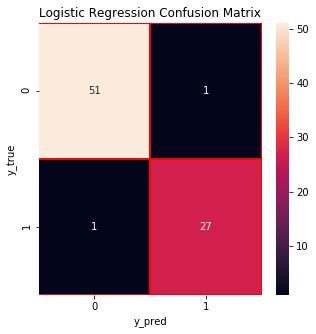

In [39]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.975

In [41]:
#2.Using KNN-K Nearest Neighbours

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
y_pred

C:\Users\Deepak\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [43]:
y_test

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

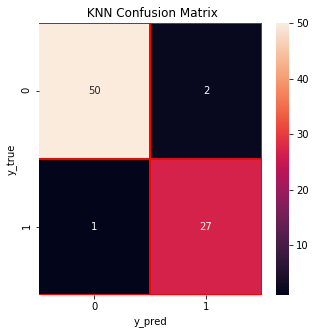

In [44]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9625

In [46]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.962912087912088

[]

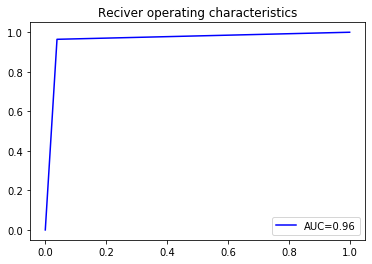

In [47]:
plt.title('Reciver operating characteristics')
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot()

In [48]:
from joblib import dump
dump(sc,"scalar.save")

['scalar.save']

In [51]:
import pickle
pickle.dump(lr,open('decison2.pkl','wb'))